In [10]:
 !find train/* -type f | wc -l

10222


In [11]:
 !find test/* -type f | wc -l

10357


In [1]:
!mv `ls train/* | shuf -n 1022` dev/

In [2]:
 !find dev/* -type f | wc -l

1022


In [3]:
 !find train/* -type f | wc -l

9200


In [16]:
import shutil
import os
import pandas as pd
from tqdm import tqdm

In [12]:
df = pd.read_csv('labels.csv')

In [13]:
path = 'data/categorical/train'

if os.path.exists(path):
    print('path exists')
    shutil.rmtree(path)
    
for i, (fname, breed) in tqdm(df.iterrows()):
    path2 = '%s/%s' % (path, breed)
    if not os.path.exists(path2):
        os.makedirs(path2)
    shutil.copyfile('data/original/train/%s.jpg' % fname, '%s/%s.jpg' % (path2, fname))

In [18]:
df = pd.read_csv('sample_submission.csv')
path = 'data/categorical/test'
breed = 'unknown'

if os.path.exists(path):
    shutil.rmtree(path)

for fname in tqdm(df['id']):
    path2 = '%s/%s' % (path, breed)
    if not os.path.exists(path2):
        os.makedirs(path2)
    shutil.copyfile('data/original/test/%s.jpg' % fname, '%s/%s.jpg' % (path2, fname))

100%|██████████| 10357/10357 [00:07<00:00, 1357.05it/s]


#### Import dependencies

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.02
tf.Session(config=config)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import csv
import os
from PIL import Image
from tqdm import tqdm
%matplotlib inline

In [3]:
datagen = ImageDataGenerator(
    rotation_range = 40,        
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range=0.2,    
    zoom_range = 0.2,
    fill_mode='nearest')


In [4]:
img = load_img('train/bf4cee97c84ad782f0bcb59b9d42e022.jpg')

<class 'PIL.JpegImagePlugin.JpegImageFile'>


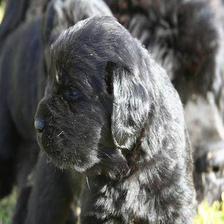

In [5]:
print(type(img))
img

In [6]:
x = img_to_array(img)
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(224, 224, 3)


In [7]:
x = x.reshape((1, ) + x.shape) # 4 channels are required for image data generator in keras

In [9]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FCBA0143C50>


In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='aug', save_prefix='lulz', save_format='jpeg'):
    i+=1
    if i>20:break

## preprocess

In [5]:
df_train = pd.read_csv('labels.csv')

In [6]:
df_test = pd.read_csv('sample_submission.csv')

In [7]:
print(df_train.shape)
df_train.head(3)

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese


In [8]:
print(df_test.shape)
df_test.head(3)

(10357, 121)


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [9]:
# targets_series = pd.Series(train_label['breed'])
# print(targets_series.shape)
# targets_series.head()
df_train['breed'].shape

(10222,)

In [10]:
one_hot = pd.get_dummies(df_train['breed'], sparse = True)

In [11]:
one_hot.head(3)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
one_hot_labels = np.asarray(one_hot)

In [13]:
print(one_hot_labels.shape)
one_hot_labels

(10222, 120)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
X_test = []

In [14]:
X_train = []
Y_train = []
X_test = []

In [15]:
i = 0 
for f, breed in tqdm(df_train.values):
    img = img_to_array(load_img('data/train/{}.jpg'.format(f), target_size=(224, 224, 3)))
    X_train.append(img)
    Y_train.append(one_hot_labels[i])
    i += 1

100%|██████████| 10222/10222 [03:28<00:00, 48.94it/s]


In [18]:
for f in tqdm(df_test['id'].values):
    img = img_to_array(load_img('data/test/{}.jpg'.format(f), target_size=(224, 224, 3)))
    X_test.append(img)

100%|██████████| 10357/10357 [03:28<00:00, 49.77it/s]


In [19]:
X_train = np.array(X_train, np.float32) / 255.
Y_train = np.array(Y_train, np.uint8)
X_test  = np.array(X_test, np.float32) / 255.

In [20]:
X_train.shape, Y_train.shape, X_test.shape

((10222, 224, 224, 3), (10222, 120), (10357, 224, 224, 3))

In [21]:
np.save('data/processed/X_train.npy', X_train)
np.save('data/processed/Y_train.npy', Y_train)
np.save('data/processed/X_test.npy', X_test)


### old stuff

In [ ]:
# train_label, dev_label = train_test_split(label_data, test_size=0.10, random_state=0, stratify=label_data['breed'])

In [9]:
label_data.loc[label_data['id']=='00214f311d5d2247d5dfe4fe24b2303d']['breed'].as_matrix()[0]

'bluetick'

In [7]:
unique_labels = pd.unique(label_data['breed'])
len(unique_labels), unique_labels[105]
ul = list(unique_labels)

In [9]:
ul.index('pomeranian')

105

In [16]:
# labels = pd.value_counts(label_data['breed'])#to get index of any element in numpy array
np.where(unique_labels=='pomeranian')[0][0]

105

In [18]:
# X as float32 won't show exact color image, turn its dtype to uint8 to see how it looks actually, it's nessessary to set X to float32
def load_data(label_data):
    X = np.zeros(([label_data.shape[0], 224, 224, 3]), dtype='float32')
    Y = np.zeros(([label_data.shape[0], 120]), dtype='float32')
    for i, id_ in enumerate(label_data['id']):
        file = 'train/' + id_ + '.jpg'
        img = mpimg.imread(file)
        X[i] = img
        breed = label_data.loc[label_data['id']==id_]['breed'].as_matrix()[0]
        Y[i][ul.index(breed)] = 1.
    return (X, Y)
